## out_cat comparison
Let's now compare the **out_cast** that we get with the one given by *Vizier*

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table


In [2]:
path = '../Data/'
dataPath = 'sextans/'

mt = Table.read(path+'utils/master_table_edr3_final.txt',format='ascii')
it = np.where((mt['name']=='Sextans'))
mt = mt[it]
output = Table.read(path+dataPath+'/out_cat/out_test_Sextans_eDR3.fits', format='fits')
output0 = Table.read(path+dataPath+'/out_test_Sextans_eDR3_Battaglia.fits', format='fits')

output_pd = output.to_pandas()
output0_pd = output0.to_pandas()

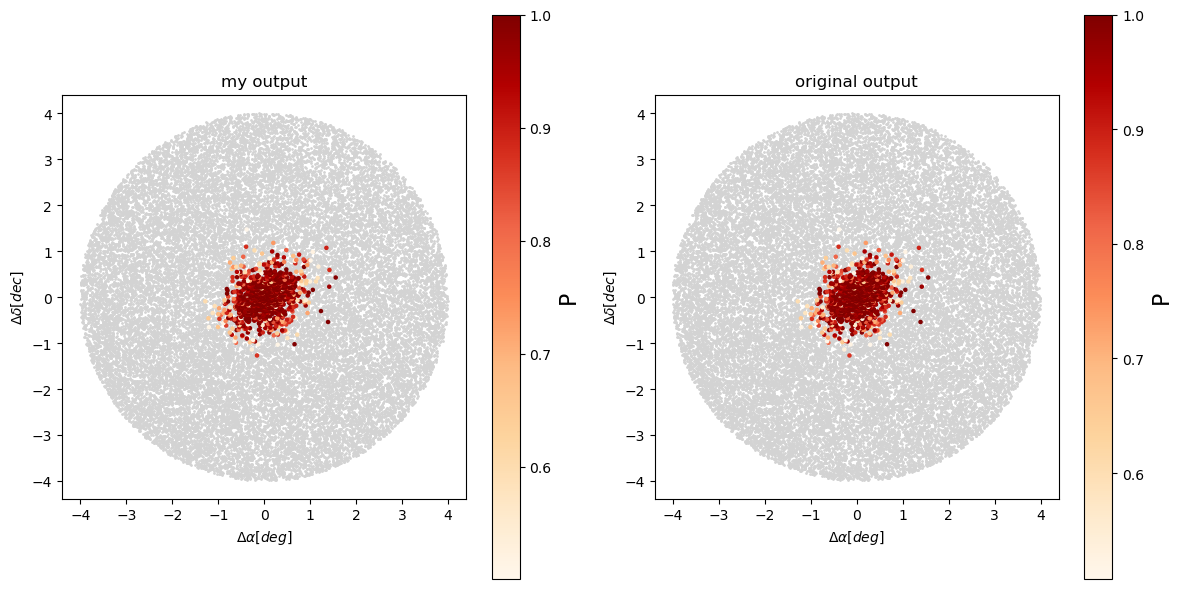

In [3]:
output_sextans_members = output[output['P'] >= 0.5]
output0_sextans_members = output0[output0['P'] >= 0.5]

# fontsize
fsize = 14

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter((output['ra'] - mt['ra'][0]), (output['dec'] - mt['dec'][0]), c='lightgray', s=1)
cs1 = ax1.scatter((output_sextans_members['ra'] - mt['ra'][0]), (output_sextans_members['dec'] - mt['dec'][0]), 
            c=output_sextans_members['P'], cmap='OrRd', s=5)
ax1.set_xlabel(r'$\Delta \alpha [deg]$')
ax1.set_ylabel(r'$\Delta \delta [dec]$')
ax1.set_title('my output')
ax1.set_aspect('equal')
cbar = fig.colorbar(cs1)
cbar.ax.set_ylabel('P',fontsize=fsize+2)

ax2.scatter((output0['ra'] - mt['ra'][0]), (output0['dec'] - mt['dec'][0]), c='lightgray', s=1)
cs2 = ax2.scatter((output0_sextans_members['ra'] - mt['ra'][0]), (output0_sextans_members['dec'] - mt['dec'][0]), 
            c=output0_sextans_members['P'], cmap='OrRd', s=5)
ax2.set_xlabel(r'$\Delta \alpha [deg]$')
ax2.set_ylabel(r'$\Delta \delta [dec]$')
ax2.set_title('original output')
ax2.set_aspect('equal')
cbar = fig.colorbar(cs2)
cbar.ax.set_ylabel('P',fontsize=fsize+2)

plt.tight_layout()
fig.savefig(path+dataPath+'Comparison_plots/sextans_members.jpeg', bbox_inches='tight', dpi=150)

let's see $\Delta P$ between mine and the one given by Battaglia

In [4]:
delta_probability = []

inter, ia, ib = np.intersect1d(output['source_id'].data, output0['source_id'].data, return_indices=True)

filtered_output = output[ia]
print(len(output0))
print(len(filtered_output))
print(len(output))

32388
32388
32429


In [5]:
# Find common source_ids between the two tables
common_source_ids, ia, ib = np.intersect1d(output0['source_id'].data, filtered_output['source_id'].data, return_indices=True)

# Get the P values for these common source_ids
prob_output0 = output0['P'][ia]
prob_output = filtered_output['P'][ib]

# Calculate delta probabilities
delta_probability = prob_output - prob_output0

# Print the results
print(f"Common source IDs: {common_source_ids}")
print(f"Delta probabilities: {delta_probability}")

Common source IDs: [3773716978192801664 3773728587489525504 3773728896727175680 ...
 3856211613342521856 3856230579918177536 3856278717911927040]
Delta probabilities:            P            
------------------------
  1.3507989081495787e-38
-1.5664717175454094e-297
 -3.5613013558372473e-13
  -4.517488439326506e-66
 -3.8537592914730653e-22
  3.6685816909423155e-72
  -5.715614553882791e-27
 -3.6192931082147874e-13
 -3.4951549309404337e-25
 -2.5535493516243484e-21
                     ...
   -5.68219505604258e-29
  -6.752423523963421e-31
 -1.7352638884394373e-15
  3.470660916707831e-174
   7.924227965913219e-36
                     0.0
 -1.8803498492413737e-15
  2.0836764039885342e-22
   2.583762076199139e-10
   7.217711868687308e-10
Length = 32388 rows


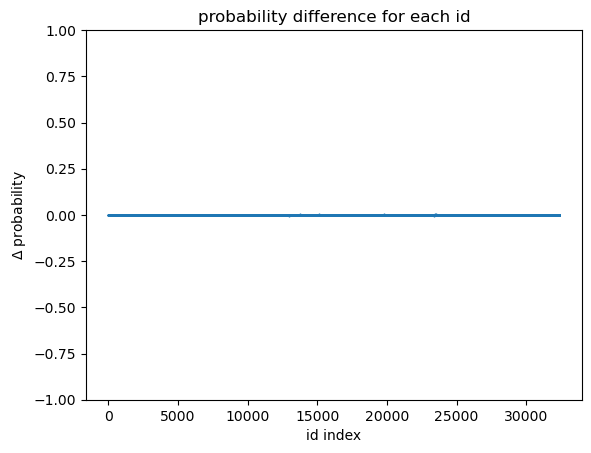

In [7]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, len(delta_probability), 1), delta_probability, '.', markersize=1)
ax.set_ylim(-1, 1)
ax.set_xlabel('id index')
ax.set_ylabel(f'$\Delta$ probability')
ax.set_title('probability difference for each id')
fig.savefig(path+dataPath+'Comparison_plots/sextans_probability_difference.jpeg', bbox_inches='tight', dpi=150)

Let's make a hist

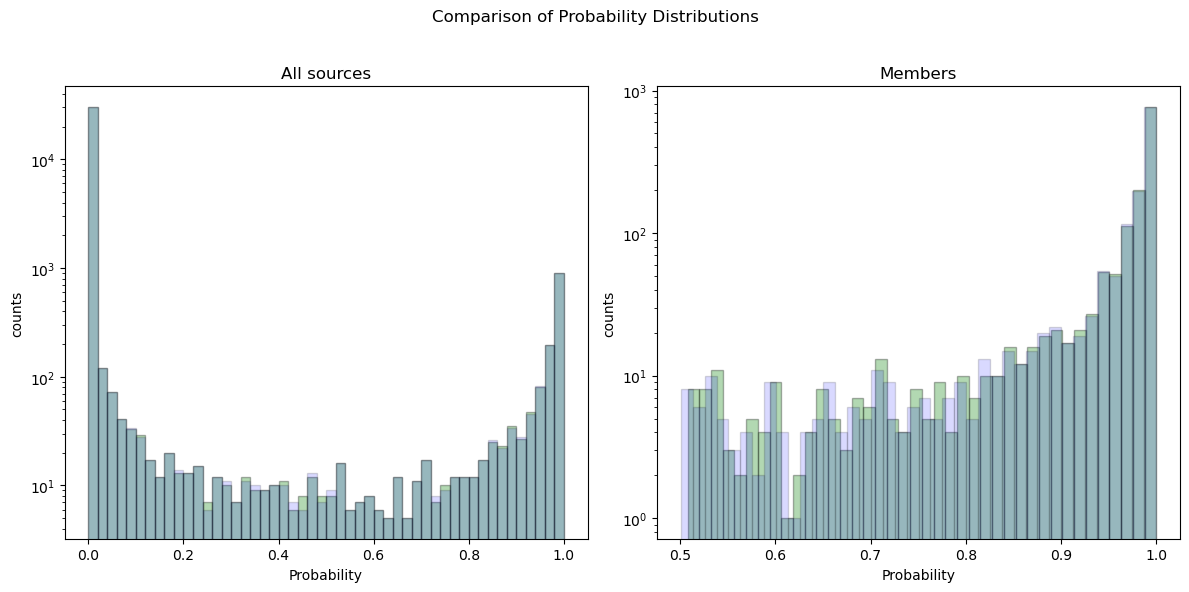

In [8]:
output0_members = output0[output0['P'] >= 0.5]
output_members = filtered_output[filtered_output['P'] >= 0.5]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(output0['P'], bins=50, density=False, alpha=0.3, color='g', edgecolor='black', label='original output')
ax1.hist(filtered_output['P'], bins=50, density=False, alpha=0.15, color='blue', edgecolor='black', label='my output')
ax1.set_yscale('log')
ax1.set_xlabel('Probability')
ax1.set_ylabel('counts')
ax1.set_title('All sources')

ax2.hist(output0_members['P'], bins=40, density=False, alpha=0.3, color='g', edgecolor='black', label='original output')
ax2.hist(output_members['P'], bins=40, density=False, alpha=0.15, color='blue', edgecolor='black', label='my output')
ax2.set_yscale('log')
ax2.set_xlabel('Probability')
ax2.set_ylabel('counts')
ax2.set_title('Members')

fig.suptitle('Comparison of Probability Distributions')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
fig.savefig(path+dataPath+'Comparison_plots/sextans_probability_distribution.jpeg', bbox_inches='tight', dpi=150)

We can see that we don't have the exact probability of membership for the same object